In [45]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #set the seaborn on top of matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle

In [46]:
df_segmentation = pd.read_csv('Main_Data_segmentation_data.csv', index_col = 0)
df_segmentation.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0


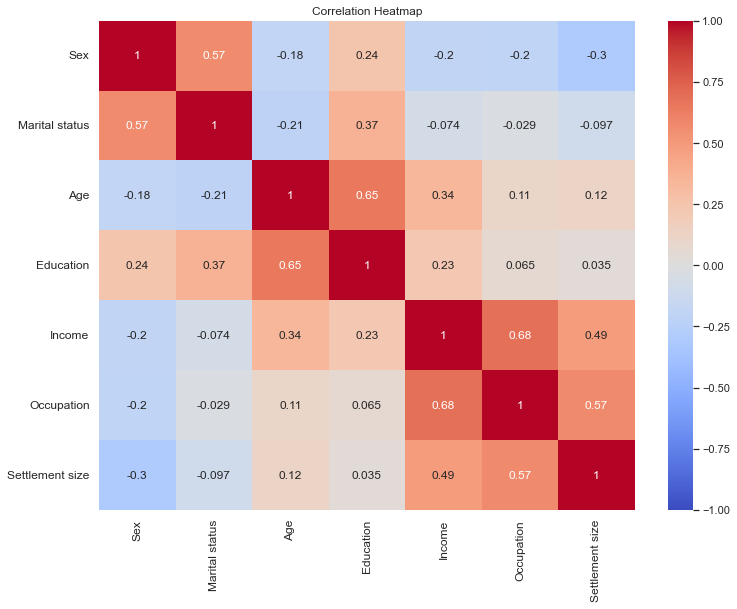

In [47]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_segmentation.corr(),
               annot = True, 
               cmap = 'coolwarm',
              vmin = -1, 
              vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

#vmax, vmin are like plt.xticks i.e., they give boundry values of graph
#cmap is color scheme

## ${\textbf{K-means Clustering}}$


In [48]:
scaler=StandardScaler()
segmentation_std=scaler.fit_transform(df_segmentation)

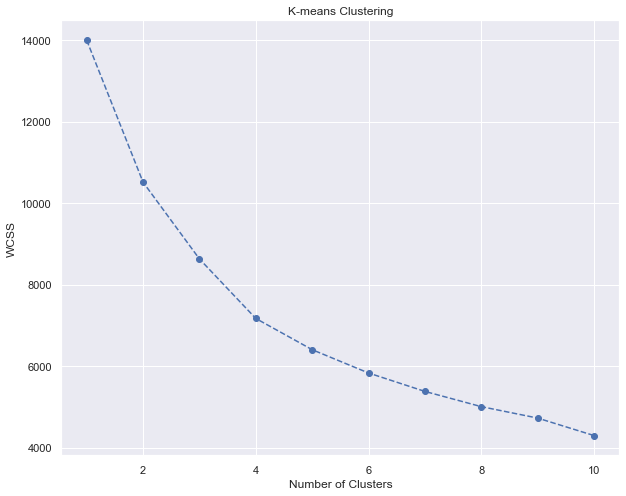

In [49]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [50]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
cluster_no=kmeans.fit_predict(segmentation_std)
# cluster_no stores the cluster no (0-3) for each row of the data


# or you do these:
# Kmeans.fit(segmentation_std)
# kmeans.labels_  : also does the same job of storing cluster no (0-3) for each row of the data



In [51]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_    #or = cluster_no
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()


#From the mean groupby we say that our 4 segments of people are: 
# 0:well-off , 1:fewer-opportunities, 2:standard, 3: career focused
df_segm_analysis=df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


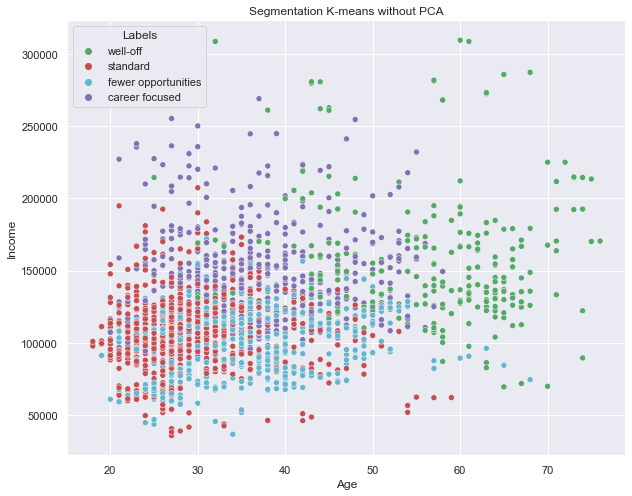

In [52]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  3:'career focused'})

# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means without PCA')
plt.show()


# ${\textbf{PCA}}$


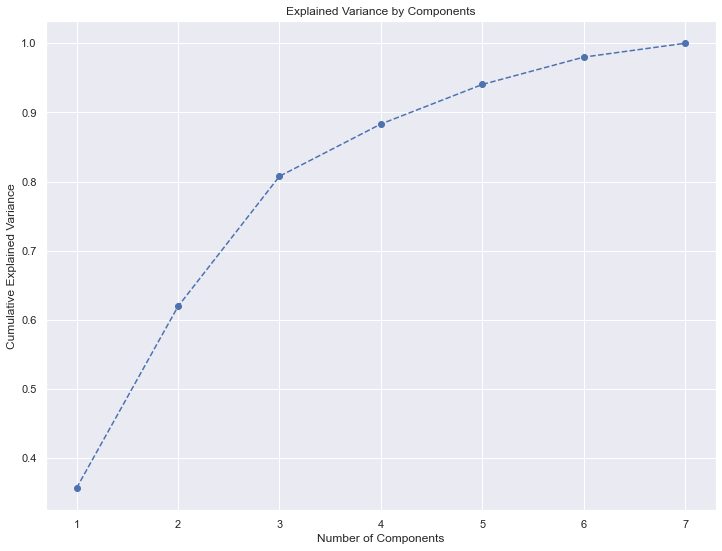

In [53]:
pca = PCA()
pca.fit(segmentation_std)

plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [54]:
#from graph clusters = 3 is the best as has high vairance capture + low variables
pca = PCA(n_components = 3)  
pca.fit(segmentation_std)  
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


In [55]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114])

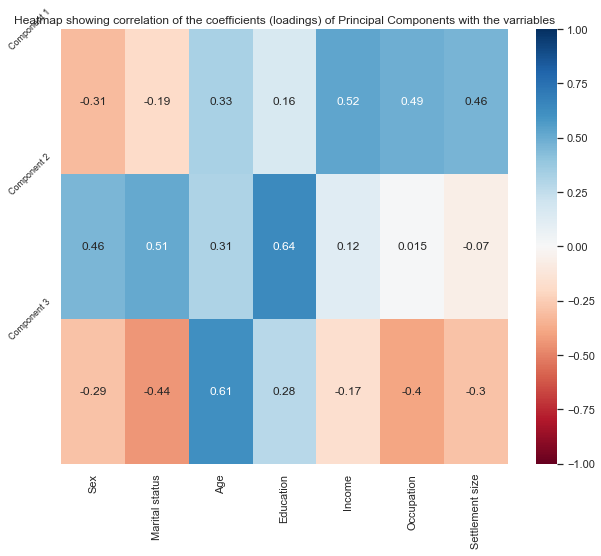

In [56]:
plt.figure(figsize = (10,8))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)
plt.title('Heatmap showing correlation of the coefficients (loadings) of Principal Components with the varriables' )
plt.show()
#here we name the 3 principal components name and function:
# PC 1 = Career: Age, Education, Income, Occupation, settlement size, these variables have high correlation with PC1, therefore we can give it a name career, it shows career focus of a person.
# PC 2 = Education-Lifestyle:  Gender, marital status, education have high corelation with PC2 therefore PC2 is called Edu-life
# PC 3 = Experience: Age has high correlation with PC3 therefore PC3 is experience. 



In [57]:
scores_pca = pca.transform(segmentation_std) #stores PC1,PC2,PC3 for all the rows
scores_pca 

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

# K-Means on the PCA data (i.e. on the data having 3 columns or variables)

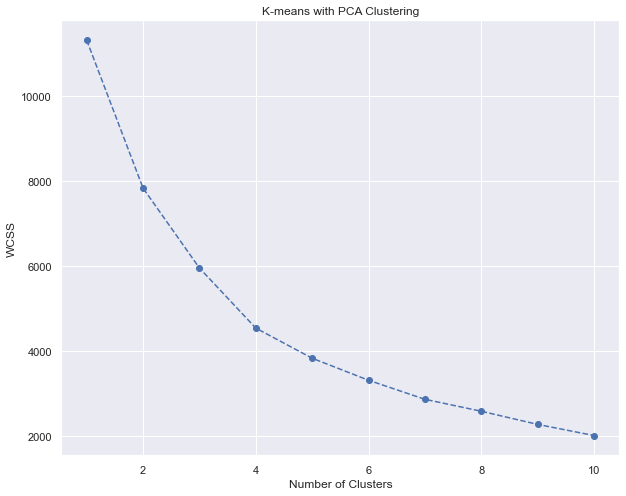

In [58]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)   #notice here we input scores_pca and not segmentation_std
    wcss.append(kmeans_pca.inertia_)
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [59]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_pca.fit_predict(scores_pca)
#apply K-Means on the PCA 1,2,3 data (this data 'scores_pca' has 3 columns only== Dimensionality reduction )

array([3, 0, 2, ..., 2, 0, 2])

In [60]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']  #rename columns

df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_ #add cluster number to column
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3,well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0,standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2,fewer opportunities
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1,career focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1,career focused


In [61]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA'])[['Component 1','Component 2','Component 3']].mean()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'
                                                          })

df_segm_pca_kmeans_freq
#From the group by we say that our 4 segments of people are: 
# 0:standard , 1:career focused, 2:fewer opportunities, 3: well-off

,Component 1,Component 2,Component 3
Segment K-means PCA,,,
standard,-1.107019,0.703776,-0.781410
career focused,1.372663,-1.046172,-0.248046
fewer opportunities,-1.046406,-0.902963,1.003644
well-off,1.687328,2.031200,0.844039


# Graphs after PCA is applied

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


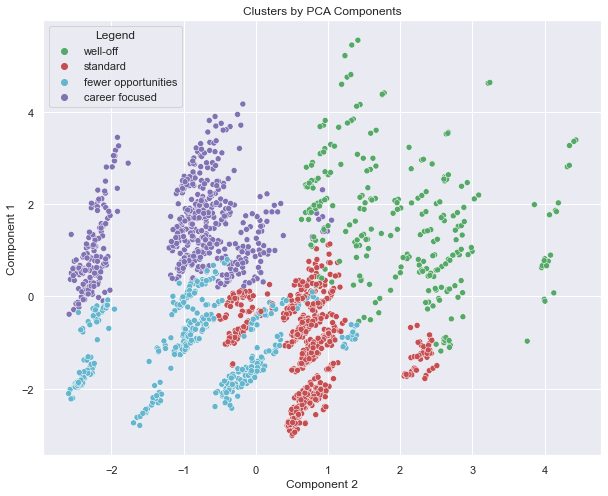

In [62]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

In [63]:
a=df_segm_kmeans.groupby('Labels')[['Age']].count()
a['BEFORE PCA - No. of customers in the cluster']=a['Age']
a[['BEFORE PCA - No. of customers in the cluster']]

,BEFORE PCA - No. of customers in the cluster
Labels,
career focused,570
fewer opportunities,462
standard,705
well-off,263


In [64]:
a=df_segm_pca_kmeans.groupby('Legend')[['Age']].count()
a['AFTER PCA - No. of customers in the cluster']=a['Age']
a[['AFTER PCA - No. of customers in the cluster']]

,AFTER PCA - No. of customers in the cluster
Legend,
career focused,583
fewer opportunities,460
standard,692
well-off,265


In [65]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))
pickle.dump(pca, open('pca.pickle', 'wb'))
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))